<a href="https://colab.research.google.com/github/pratikagithub/Machine-Learning-All-Algorithms/blob/main/ML_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multicollinearity and its Impact**

Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated. This can make the model unreliable as it inflates the variance of the coefficient estimates, which makes them unstable.

Question 1: ***You are given a dataset containing the following features: Income, Education, Work Experience, and Spending Score. It has been observed that Income and Work Experience are highly correlated. How will you detect and handle multicollinearity before applying Linear Regression?***


**Solution:** Detect multicollinearity using the Variance Inflation Factor (VIF). Here’s how to solve this problem using Python:

In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sample data
data = {'Income': [60, 70, 80, 90, 100],
        'Education': [12, 14, 16, 18, 20],
        'Work_Experience': [10, 12, 14, 16, 18],
        'Spending_Score': [30, 40, 50, 60, 70]}
df = pd.DataFrame(data)

# calculate VIF
X = df[['Income', 'Education', 'Work_Experience']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor:")
print(vif_data)

Variance Inflation Factor:
           Feature     VIF
0           Income     inf
1        Education     inf
2  Work_Experience  1683.0


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


The VIF output shows that Income and Education have infinite VIF values, indicating perfect multicollinearity, likely because they are linear combinations or duplicates of each other. Work_Experience also has a very high VIF (1683.0), suggesting strong multicollinearity with the other variables. To resolve this, we should remove one of the highly collinear features (Income or Education) and re-evaluate the VIF values. This will improve model stability and reduce redundancy.

**Overfitting and Regularization**

Overfitting occurs when the model fits the training data too well but performs poorly on unseen data. To address this, we use regularization techniques like Lasso (L1) and Ridge (L2), which penalize large coefficients.

***Question 2: You are working on a small dataset with 50 features. Your Linear Regression model is overfitting. How can you ensure generalization while identifying the most important features?***


**Solution:** Use Lasso Regression to reduce overfitting and perform feature selection by shrinking coefficients to zero. Here’s how to solve it using Python:

In [2]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# generate synthetic data
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 50)  # 50 features
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100)  # Linear relation with noise

# train Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha controls regularization strength
lasso.fit(X, y)

# print non-zero coefficients
print("Number of non-zero coefficients:", np.sum(lasso.coef_ != 0))
print("Lasso Coefficients:", lasso.coef_)
print("Mean Squared Error:", mean_squared_error(y, lasso.predict(X)))

Number of non-zero coefficients: 2
Lasso Coefficients: [ 1.69811862  0.42442209  0.          0.          0.          0.
  0.         -0.         -0.          0.         -0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.        ]
Mean Squared Error: 1.498935490192092


The output indicates the number of non-zero coefficients retained by Lasso regression and their values. By applying a regularization strength of alpha=0.1, Lasso effectively shrinks some coefficients to zero by performing feature selection in the process. This is particularly useful for datasets with many predictors (50 in this case) to reduce overfitting and improve generalization. If too many coefficients are zero, the alpha value may be too high, and we can reduce it to retain more features.

**Handling Outliers with Robust Regression**

Linear Regression is sensitive to outliers as it minimizes squared errors. Outliers can skew the regression line. To overcome this, Robust Regression (like Huber Regression or RANSAC) can be used.

***Question 3: You are given a dataset with House Size and House Price, but it contains several extreme values for House Price. How will you ensure these outliers do not negatively impact your model?***

**Solution**: Use Huber Regression, which switches from squared to absolute error for large residuals. Here’s how to solve it using Python:

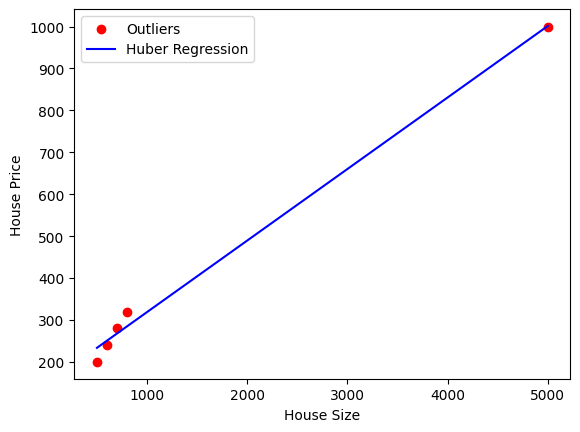

In [3]:
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt

# sample data with outliers
X = np.array([[500], [600], [700], [800], [5000]])  # House size
y = np.array([200, 240, 280, 320, 1000])  # House price (outlier at 5000)

# train Huber Regressor
huber = HuberRegressor(epsilon=1.35)
huber.fit(X, y)

# predict and plot
y_pred = huber.predict(X)
plt.scatter(X, y, color="red", label="Outliers")
plt.plot(X, y_pred, color="blue", label="Huber Regression")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.show()

Assumptions of Linear Regression and Residual Analysis
Linear Regression assumes:

1. Linearity

2. No multicollinearity

3. Homoscedasticity (constant variance of residuals)

4. Normally distributed residuals.

***Question 4: How will you verify and address violations of Linear Regression assumptions on a dataset? Specifically, show how to check homoscedasticity.***

**Solution:** Plot residuals vs. predicted values to check homoscedasticity. Here’s how to solve it using Python:

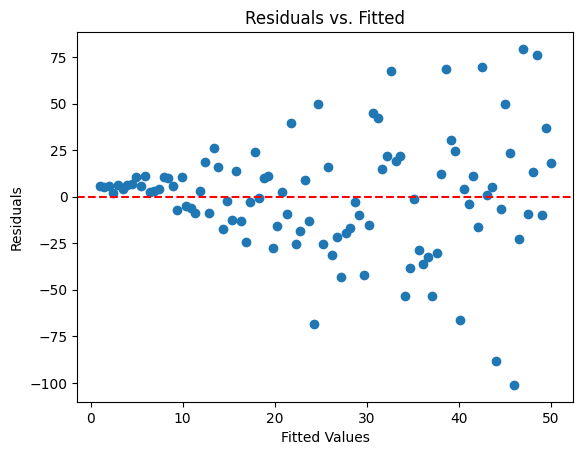

In [4]:
import statsmodels.api as sm

# simulated data with heteroscedasticity
X = np.linspace(1, 50, 100)
y = 3*X + np.random.normal(0, X, 100)  # Increasing variance

# fit OLS model
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
residuals = model.resid

# plot residuals
plt.scatter(X, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

The Residuals vs. Fitted plot shows a clear pattern of increasing variance in residuals as fitted values increase, which indicates heteroscedasticity. This violates the assumption of homoscedasticity in Linear Regression, where residuals are expected to have constant variance. The model predictions may therefore be unreliable, especially for higher fitted values.

**Dealing with Missing Data**

Linear Regression cannot handle missing values directly. Imputation techniques like mean, median, or predictive imputation must be applied.

***Question 5: You are working on a dataset with missing values in the Salary column. How will you impute the missing values in a way that does not introduce bias to your Linear Regression model?***


**Solution:** Use predictive imputation by building a separate regression model to predict missing values. Here’s how to solve it using Python:

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# data with missing values
data = {'Experience': [1, 2, 3, 4, 5],
        'Salary': [50, None, 80, None, 100]}
df = pd.DataFrame(data)

# impute missing salaries using Linear Regression
known = df.dropna()
unknown = df[df['Salary'].isnull()]

model = LinearRegression()
model.fit(known[['Experience']], known['Salary'])
imputed_salaries = model.predict(unknown[['Experience']])

# replace missing values
df.loc[df['Salary'].isnull(), 'Salary'] = imputed_salaries
print("Imputed Dataset:\n", df)

Imputed Dataset:
    Experience      Salary
0           1   50.000000
1           2   64.166667
2           3   80.000000
3           4   89.166667
4           5  100.000000
